In [1]:
import tfcomb
C = tfcomb.CombObj(verbosity=0)

In [2]:
C.TFBS_from_motifs(regions="/mnt/workspace_stud/stud4/WP6_data/right-lobe-of-liver.14.bed", 
                   motifs="/mnt/workspace_stud/stud6/repositories/Datenanalyse-2021/wp6/testdaten/JASPAR2020_CORE_vertebrates.meme",
                   genome="/mnt/workspace_stud/stud6/repositories/Datenanalyse-2021/wp6/testdaten/homo_sapiens.104.mainChr.fa", 
                   threads=8)


#### running count_within() with stranded option turned on

In [3]:
C.count_within(stranded=True, threads=8)
C.market_basket()

### Analyze preferential orientation of motifs

##### First, we create a directionality analysis for the rules found:


In [4]:
df_orientation = C.analyze_orientation()

INFO: Rules are symmetric - scenarios counted are: ['same', 'opposite']


In [5]:
df_orientation.head()

,TF1,TF2,TF1_TF2_count,same,opposite,std,pvalue
KLF15-KLF5,KLF15,KLF5,837,0.893668,0.106332,0.556730,7.513069e-115
KLF5-SP3,KLF5,SP3,475,0.930526,0.069474,0.608856,1.427187e-78
KLF15-SP3,KLF15,SP3,524,0.904580,0.095420,0.572163,1.359082e-76
KLF15-SP9,KLF15,SP9,522,0.894636,0.105364,0.558100,1.077944e-72
KLF5-SP9,KLF5,SP9,449,0.924276,0.075724,0.600017,2.769751e-72


We can subset these on pvalue and number of sites:

In [6]:
orientation_selected = df_orientation[(df_orientation["pvalue"] < 0.01)
              & (df_orientation["TF1_TF2_count"] > 50)]

In [7]:
#Number of TF pairs with significant differences in orientation
orientation_selected.shape[0]

201

### Visualization of orientation preference

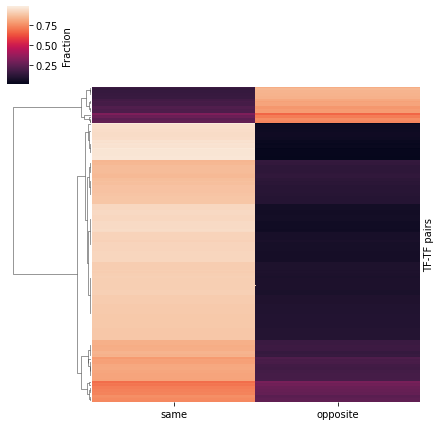

In [8]:
orientation_heatmap=orientation_selected.plot_heatmap()

We can select the subsets by investigating the selected pairs:

In [9]:
#orientation_selected.sort_values("same").tail(5)

In [10]:
#orientation_selected.sort_values("opposite").tail(5)


### Extended analysis with directional=True

#### The first analysis presented does not take into account the relative order of TF1-TF2, e.g. if the orientation "same" represents "TF1-TF2" or


In [11]:
C.count_within(directional=True, stranded=True, threads=8)
C.market_basket()


In [12]:
df_orientation = C.analyze_orientation()

INFO: Rules are directional - scenarios counted are: ['TF1-TF2', 'TF2-TF1', 'convergent', 'divergent']


In [13]:
df_orientation.head()

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
KLF15-KLF15,KLF15,KLF15,997,0.465396,0.465396,0.032096,0.037111,0.248727,4.124200e-160
KLF5-KLF5,KLF5,KLF5,717,0.479777,0.479777,0.025105,0.015342,0.265353,5.493551e-131
KLF15-KLF5,KLF15,KLF5,837,0.454002,0.439665,0.050179,0.056153,0.227373,3.198966e-112
KLF5-SP3,KLF5,SP3,475,0.471579,0.458947,0.037895,0.031579,0.248631,4.598952e-76
KLF15-SP3,KLF15,SP3,524,0.459924,0.444656,0.041985,0.053435,0.233714,3.877240e-74


similarly to the first analysis, we can select the significant pairs and visualize the preferences for orientation:

In [14]:
orientation_selected = df_orientation[(df_orientation["pvalue"] < 0.05)
              & (df_orientation["TF1_TF2_count"] > 50)]             

In [15]:
orientation_selected.shape[0]

203

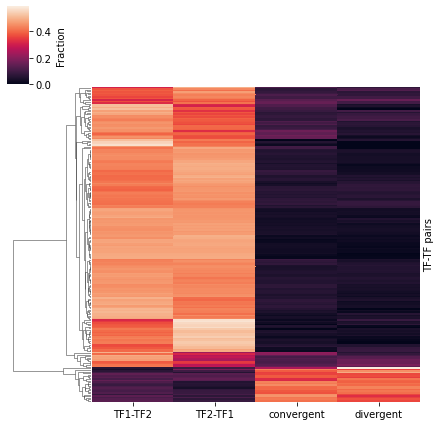

In [16]:
orientation_heatmap = orientation_selected.plot_heatmap()


### In-depth look at preferential orientation



By sorting the selected co-occurring TF pairs, it is also possible to visualize the top pairs within each scenario as seen below.


#### TFs specific in TF1-TF2 orientation

In [17]:
orientation_selected.sort_values("TF1-TF2", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
KLF14-KLF6,KLF14,KLF6,51,0.568627,0.411765,0.019608,0.000000,0.284764,9.590422e-11
KLF10-KLF11,KLF10,KLF11,58,0.551724,0.413793,0.034483,0.000000,0.274963,2.208568e-11
KLF10-SP9,KLF10,SP9,53,0.547170,0.396226,0.056604,0.000000,0.264319,1.220531e-09
KLF10-KLF16,KLF10,KLF16,71,0.521127,0.380282,0.098592,0.000000,0.242148,8.156442e-11
KLF11-Klf12,KLF11,Klf12,52,0.519231,0.423077,0.000000,0.057692,0.259437,4.012127e-09
KLF10-KLF5,KLF10,KLF5,81,0.518519,0.320988,0.123457,0.037037,0.214870,9.828908e-10
KLF10-KLF15,KLF10,KLF15,81,0.518519,0.308642,0.123457,0.049383,0.209604,2.844566e-09
KLF16-KLF3,KLF16,KLF3,63,0.507937,0.428571,0.047619,0.015873,0.254423,1.345694e-10
KLF10-SP3,KLF10,SP3,69,0.507246,0.434783,0.057971,0.000000,0.258002,6.486039e-12
KLF16-Klf12,KLF16,Klf12,66,0.500000,0.409091,0.030303,0.060606,0.239407,7.630267e-10


#### TFs specific in TF2-TF1 orientation

In [18]:
orientation_selected.sort_values("TF2-TF1", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
EGR3-KLF5,EGR3,KLF5,73,0.342466,0.575342,0.041096,0.041096,0.259281,1.014536e-12
EGR3-KLF16,EGR3,KLF16,56,0.321429,0.571429,0.017857,0.089286,0.250425,3.741607e-09
KLF3-SP4,KLF3,SP4,71,0.394366,0.563380,0.042254,0.000000,0.273683,8.982474e-14
Klf12-SP4,Klf12,SP4,84,0.369048,0.559524,0.023810,0.047619,0.259549,1.198998e-14
Klf12-SP9,Klf12,SP9,58,0.379310,0.551724,0.000000,0.068966,0.260149,3.303889e-10
KLF3-SP1,KLF3,SP1,78,0.384615,0.551282,0.051282,0.012821,0.261174,8.854019e-14
KLF3-SP3,KLF3,SP3,61,0.426230,0.540984,0.016393,0.016393,0.273784,7.323056e-12
KLF6-SP4,KLF6,SP4,82,0.426829,0.536585,0.036585,0.000000,0.271690,1.164304e-15
KLF11-KLF6,KLF11,KLF6,56,0.428571,0.535714,0.035714,0.000000,0.271992,9.190666e-11
Klf12-SP3,Klf12,SP3,71,0.422535,0.535211,0.000000,0.042254,0.268808,2.723787e-13



#### TFs specific in convergent orientation

In [19]:
orientation_selected.sort_values("convergent", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
SP4-Zfx,SP4,Zfx,85,0.141176,0.070588,0.458824,0.329412,0.176960,5.385006e-07
CTCFL-KLF15,CTCFL,KLF15,102,0.078431,0.107843,0.450980,0.362745,0.185067,4.168867e-09
CTCFL-KLF5,CTCFL,KLF5,67,0.089552,0.059701,0.447761,0.402985,0.203692,2.706306e-07
SP1-Zfx,SP1,Zfx,92,0.119565,0.054348,0.434783,0.391304,0.190966,9.381149e-09
KLF15-ZNF263,KLF15,ZNF263,79,0.037975,0.177215,0.430380,0.354430,0.176725,1.668870e-06
KLF16-Zfx,KLF16,Zfx,80,0.100000,0.062500,0.425000,0.412500,0.195523,5.325414e-08
SP3-Zfx,SP3,Zfx,85,0.129412,0.070588,0.423529,0.376471,0.175914,6.464125e-07
ZNF148-ZNF263,ZNF148,ZNF263,62,0.112903,0.112903,0.419355,0.354839,0.160482,2.531868e-04
SP9-Zfx,SP9,Zfx,80,0.137500,0.087500,0.412500,0.362500,0.161374,1.544050e-05
CTCFL-SP1,CTCFL,SP1,52,0.115385,0.076923,0.403846,0.403846,0.178339,1.826704e-04


#### TFs specific in divergent orientation

In [20]:
orientation_selected.sort_values("divergent", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
KLF5-NR2C2,KLF5,NR2C2,51,0.058824,0.098039,0.254902,0.588235,0.240879,9.506252e-08
CTCFL-SP3,CTCFL,SP3,51,0.098039,0.058824,0.352941,0.490196,0.206504,9.097082e-06
CTCFL-ZNF148,CTCFL,ZNF148,62,0.064516,0.096774,0.387097,0.451613,0.197759,2.136983e-06
CTCFL-KLF16,CTCFL,KLF16,55,0.127273,0.036364,0.400000,0.436364,0.198271,9.791524e-06
SP2-Zfx,SP2,Zfx,62,0.112903,0.048387,0.403226,0.435484,0.197759,2.136983e-06
KLF5-Zfx,KLF5,Zfx,128,0.109375,0.085938,0.382812,0.421875,0.176892,2.065254e-10
ZNF148-Zfx,ZNF148,Zfx,74,0.108108,0.148649,0.324324,0.418919,0.146587,2.630452e-04
KLF16-Zfx,KLF16,Zfx,80,0.100000,0.062500,0.425000,0.412500,0.195523,5.325414e-08
CTCFL-SP9,CTCFL,SP9,56,0.125000,0.089286,0.375000,0.410714,0.166241,3.352462e-04
CTCFL-SP1,CTCFL,SP1,52,0.115385,0.076923,0.403846,0.403846,0.178339,1.826704e-04


 #### .loc-operator to show the results of a subset of TF1-TF2-pairs:

In [21]:
#df_orientation.loc[["EGR1-MYOD1","SP1-SP1","WT1-ZFP82"]]

In [22]:
TF_pairs =list(orientation_selected[["TF1","TF2"]].itertuples(index=False, name=None)) 
len(TF_pairs)


203

In [23]:
#selection=cobj.select_custom_rules(names)
#selection=df.select_custom_rules(names)
#selection=C.select_custom_rules(names)
#selection=selected.select_custom_rules(names)

In [26]:
from tfcomb import CombObj
genome_path="/mnt/workspace_stud/stud6/repositories/Datenanalyse-2021/wp6/testdaten/homo_sapiens.104.mainChr.fa"
motif_path="/mnt/workspace_stud/stud6/repositories/Datenanalyse-2021/wp6/testdaten/JASPAR2020_CORE_vertebrates.meme"
result_path="/mnt/workspace_stud/stud6/repositories/Datenanalyse-2021/wp6/analyse/results/wp2/main/"

In [27]:
Liver_object = CombObj().from_pickle(f"{result_path}right-lobe-of-liver.14.pkl")

In [28]:
TF_pairs_of_orientation_for_distance=Liver_object.select_custom_rules(TF_pairs)

In [29]:
TF_pairs_of_orientation_for_distance.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
0,KLF15,KLF15,533,1054,1054,0.505693,21.101107
1,KLF5,KLF5,373,787,787,0.473952,20.023870
2,KLF15,KLF5,837,1054,787,0.919005,29.471857
3,KLF5,SP3,475,787,489,0.765688,25.579665
4,KLF15,SP3,524,1054,489,0.729889,23.370896
...,...,...,...,...,...,...,...
198,KLF9,ZNF148,64,179,605,0.194480,3.901860
199,KLF5,ZNF263,60,787,196,0.152769,0.762508
200,MAZ,ZNF460,57,353,313,0.171481,3.325687
201,SP1,ZNF460,51,462,313,0.134115,0.288427


In [30]:
TF_pairs_of_orientation_for_distance.analyze_distances(threads=6)

INFO: DistObject successfully created! It can be accessed via combobj.distObj
INFO: Calculating distances
INFO: Normalizing data.
INFO: Done finding distances! Results are found in .distances
INFO: Run .linregress_all() to fit linear regression
INFO: Fitting linear regression. With number of threads: 6
INFO: Linear regression finished! Results can be found in .linres
INFO: Correcting background with 6 threads.
INFO: Background correction finished! Results can be found in .corrected
INFO: Smoothing signals with window size 3
INFO: Shifting signals above zero
INFO: Analyzing Signal with threads 6
INFO: Done analyzing signal. Results are found in .peaks


In [31]:
TF_pairs_of_orientation_for_distance.distObj.evaluate_noise(threads=6)

INFO: Evaluating noisiness of the signals with 6 threads


In [32]:
TF_pairs_of_orientation_for_distance.distObj.rank_rules()

In [33]:
TF_pairs_of_orientation_for_distance.distObj.peaks

,TF1,TF2,Distance,Peak Heights,Prominences,Threshold,TF1_TF2_count,Distance_percent,Noisiness,rank_Distance_percent,rank_Peak Heights,rank_Noisiness,mean_rank
431,ZNF460,ZNF460,17,4.576345,5.591730,2,40,0.225000,0.058099,1.0,2.0,1.0,1.333333
261,KLF5,Klf12,6,4.480905,5.403158,2,82,0.182927,0.130102,2.0,4.0,5.0,3.666667
235,KLF3,SP1,26,4.450085,5.482974,2,78,0.166667,0.133744,4.0,6.0,6.0,5.333333
80,KLF11,KLF11,9,4.446925,5.750261,2,87,0.149425,0.152508,11.0,7.0,23.0,13.666667
292,KLF6,SP1,26,4.093296,5.353589,2,88,0.136364,0.141525,25.0,20.0,13.0,19.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,KLF10,SP1,53,2.004636,3.308117,2,78,0.076923,0.358127,186.0,429.0,198.0,271.000000
305,KLF9,SP3,100,2.053131,2.053131,2,82,0.036585,0.253586,266.0,406.0,141.0,271.000000
289,KLF5,Zfx,46,2.016188,3.740407,2,128,0.070312,0.297127,213.0,424.0,179.0,272.000000
205,KLF16,SP4,36,2.029500,3.485616,2,259,0.065637,0.359455,226.0,420.0,199.0,281.666667


In [34]:
df_orientation_distance=TF_pairs_of_orientation_for_distance.distObj.peaks.merge(orientation_selected, left_on =["TF1","TF2"], right_on = ["TF1","TF2"])

In [129]:
df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)]
#df_orientation_distance


,TF1,TF2,Distance,Peak Heights,Prominences,Threshold,TF1_TF2_count_x,Distance_percent,Noisiness,rank_Distance_percent,rank_Peak Heights,rank_Noisiness,mean_rank,TF1_TF2_count_y,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
0,ZNF460,ZNF460,17,4.576345,5.591730,2,40,0.225000,0.058099,1.0,2.0,1.0,1.333333,73,0.452055,0.452055,0.041096,0.054795,0.233380,2.451810e-10
2,KLF5,Klf12,6,4.480905,5.403158,2,82,0.182927,0.130102,2.0,4.0,5.0,3.666667,82,0.451220,0.475610,0.036585,0.036585,0.246631,6.317000e-13
3,KLF3,SP1,26,4.450085,5.482974,2,78,0.166667,0.133744,4.0,6.0,6.0,5.333333,78,0.384615,0.551282,0.051282,0.012821,0.261174,8.854019e-14
6,KLF11,KLF11,9,4.446925,5.750261,2,87,0.149425,0.152508,11.0,7.0,23.0,13.666667,170,0.488235,0.488235,0.017647,0.005882,0.275132,2.927110e-33
8,KLF6,SP1,26,4.093296,5.353589,2,88,0.136364,0.141525,25.0,20.0,13.0,19.333333,88,0.420455,0.522727,0.045455,0.011364,0.259629,2.383234e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,CTCFL,KLF5,80,2.904428,3.749709,2,67,0.074627,0.24447,199.0,145.0,128.0,157.333333,67,0.089552,0.059701,0.447761,0.402985,0.203692,2.706306e-07
355,KLF14,SP2,51,2.828977,4.343704,2,76,0.078947,0.335534,176.0,157.0,192.0,175.000000,76,0.500000,0.407895,0.052632,0.039474,0.238542,3.153857e-11
359,KLF10,SP1,6,2.832637,4.988591,2,78,0.089744,0.358127,135.0,156.0,198.0,163.000000,78,0.461538,0.435897,0.102564,0.000000,0.233484,4.830936e-11
374,MAZ,SP3,0,3.137034,3.137034,2,113,0.061947,0.277802,234.0,106.0,166.0,168.666667,113,0.451327,0.442478,0.053097,0.053097,0.227392,4.032960e-15


#### Showing the dependencies of the orientation to the binding distance for each orientation 

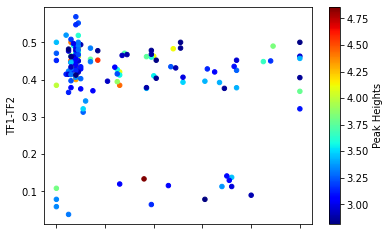

In [146]:
plot_distance_T1_TF2=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(x ='Distance', y='TF1-TF2', kind = 'scatter', c='Peak Heights', colormap='jet')


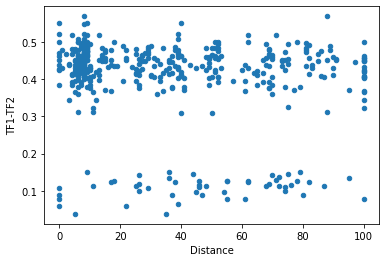

In [140]:
plot_distance_T1_TF2=df_orientation_distance.plot(x ='Distance', y='TF1-TF2', kind = 'scatter')

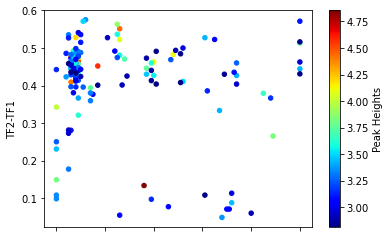

In [133]:
plot_distance_T2_TF1=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(x ='Distance', y='TF2-TF1', kind = 'scatter',c='Peak Heights', colormap='jet')

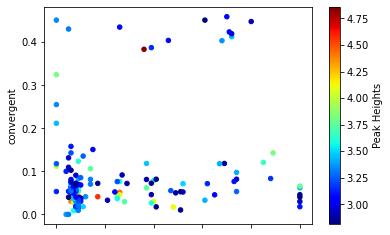

In [134]:
plot_distance_convergent=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(x ='Distance', y='convergent', kind = 'scatter',c='Peak Heights', colormap='jet')

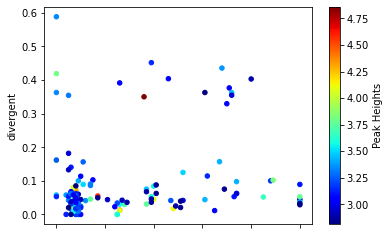

In [135]:
plot_distance_divergent=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(x ='Distance', y='divergent', kind = 'scatter',c='Peak Heights', colormap='jet')

In [151]:
#plot_distance=df_orientation_distance.plot(x = ['Distance','Distance','Distance','Distance'], y=['divergent','convergent','TF1-TF2','TF2-TF1'],kind='scatter')


Text(0, 0.5, 'orientation')

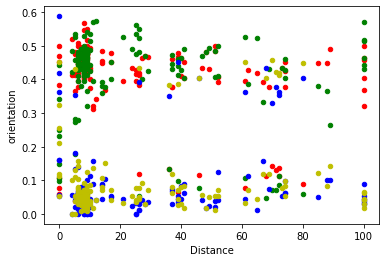

In [149]:
ax1 = df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(kind='scatter', x='Distance', y='TF1-TF2', color='r')    
ax2 = df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(kind='scatter', x='Distance', y='TF2-TF1', color='g', ax=ax1)    
ax3 = df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(kind='scatter', x='Distance', y='divergent', color='b', ax=ax1)
ax4 = df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(kind='scatter', x='Distance', y='convergent', color='y', ax=ax1)
ax1.set_ylabel("orientation")

#print(ax1 == ax2 == ax3 == ax4)


#### how many of the top 50 of each orentaion have a preferential distance

In [158]:
df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)]


,TF1,TF2,Distance,Peak Heights,Prominences,Threshold,TF1_TF2_count_x,Distance_percent,Noisiness,rank_Distance_percent,rank_Peak Heights,rank_Noisiness,mean_rank,TF1_TF2_count_y,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
0,ZNF460,ZNF460,17,4.576345,5.591730,2,40,0.225000,0.058099,1.0,2.0,1.0,1.333333,73,0.452055,0.452055,0.041096,0.054795,0.233380,2.451810e-10
2,KLF5,Klf12,6,4.480905,5.403158,2,82,0.182927,0.130102,2.0,4.0,5.0,3.666667,82,0.451220,0.475610,0.036585,0.036585,0.246631,6.317000e-13
3,KLF3,SP1,26,4.450085,5.482974,2,78,0.166667,0.133744,4.0,6.0,6.0,5.333333,78,0.384615,0.551282,0.051282,0.012821,0.261174,8.854019e-14
6,KLF11,KLF11,9,4.446925,5.750261,2,87,0.149425,0.152508,11.0,7.0,23.0,13.666667,170,0.488235,0.488235,0.017647,0.005882,0.275132,2.927110e-33
8,KLF6,SP1,26,4.093296,5.353589,2,88,0.136364,0.141525,25.0,20.0,13.0,19.333333,88,0.420455,0.522727,0.045455,0.011364,0.259629,2.383234e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,CTCFL,KLF5,80,2.904428,3.749709,2,67,0.074627,0.24447,199.0,145.0,128.0,157.333333,67,0.089552,0.059701,0.447761,0.402985,0.203692,2.706306e-07
355,KLF14,SP2,51,2.828977,4.343704,2,76,0.078947,0.335534,176.0,157.0,192.0,175.000000,76,0.500000,0.407895,0.052632,0.039474,0.238542,3.153857e-11
359,KLF10,SP1,6,2.832637,4.988591,2,78,0.089744,0.358127,135.0,156.0,198.0,163.000000,78,0.461538,0.435897,0.102564,0.000000,0.233484,4.830936e-11
374,MAZ,SP3,0,3.137034,3.137034,2,113,0.061947,0.277802,234.0,106.0,166.0,168.666667,113,0.451327,0.442478,0.053097,0.053097,0.227392,4.032960e-15


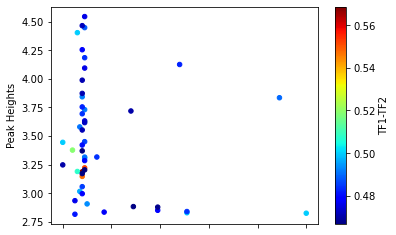

In [188]:
df_top50_T1_TF2=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].sort_values(by=['TF1-TF2'], ascending=False).head(50)
plot_top50_distance_T1_TF2=df_top50_T1_TF2.plot(x ='Distance', y='Peak Heights', kind = 'scatter', c='TF1-TF2', colormap='jet')


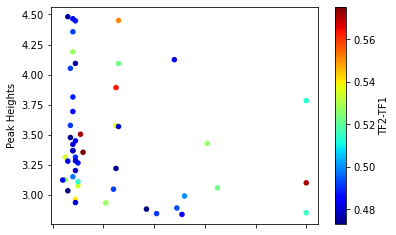

In [179]:
df_top50_T2_TF1=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].sort_values(by=['TF2-TF1'], ascending=False).head(50)
plot_top50_distance_T2_TF1=df_top50_T2_TF1.plot(x ='Distance', y='Peak Heights', kind = 'scatter', c='TF2-TF1', colormap='jet')


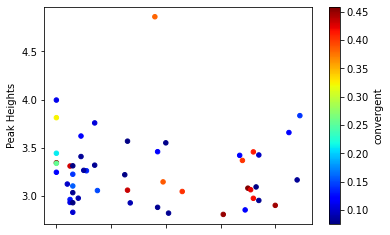

In [180]:
df_top50_convergent=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].sort_values(by=['convergent'], ascending=False).head(50)
plot_top50_distance_convergent=df_top50_convergent.plot(x ='Distance', y='Peak Heights', kind = 'scatter', c='convergent', colormap='jet')


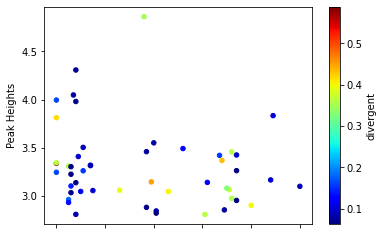

In [192]:
df_top50_divergent=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].sort_values(by=['divergent'], ascending=False).head(50)
plot_top50_distance_divergent=df_top50_divergent.plot(x ='Distance', y='Peak Heights', kind = 'scatter', c='divergent', colormap='jet')
plt.savefig("/mnt/workspace_stud/stud7/testplot.png")

In [190]:
import matplotlib.pyplot as plt